<a href="https://colab.research.google.com/github/DanielAlonsoCuriel/AlgoritmoGenetico/blob/main/Algoritmo%20Genetico%20Grupo%204%20casi%20terminado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Algorimo genético usando deap en Python


#1.- Encontrar los máximos de la función "picos"

z=f(x,y)=3(1−x)2e−(x2)−(y+1)2−10(x/5−x3−y5)e−x2−y2−1/3e−(x+1)2−y2

En el dominio
{x,y}∈[−100,100]

Utilizaremos la librería de Python deap

In [133]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Necesitamos también la librería de Python de multiprocesamiento (mecanismo de paralelización) SCOOP

In [137]:
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


La población del algoritmo no cambia de tamaño a lo largo de las generaciones, con lo que n será constante

La población inicial se elige de forma aleatoria porque queremos diversidad genética

In [138]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

Queremos generar números aleatorios entre -100 y 100 (sin incluir a estos). Podemos usar el módulo nativo random de generación de números pseudoaleatorios  y numpy.random(para generación de vectores psudoaleatorios). Recordad que los números totalmente aleatorios no existen en programación.

Utilizamos, además, el método uniform:

In [139]:
# Importamos la librería
import random
# Fijamos la semilla. Si no cambiamos la semilla, 
# la función generará los mismos número aleatorios
random.seed(0)
# Generamos los números pseudo-aleatorios en 2 list comprenhension
# para encapsular todos los datos en las listas x e y
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


Otra posibilidad es generar dos vectores de diez valores comprendidos entre -100 y 100, con una forma (1,10) (1 fila y 10 columnas). Serían dos vectores de tipo fila con diez valores

In [140]:
import numpy as np
# Fijamos la semilla
np.random.seed(0)
# Generamos los números pseudo-aleatorios
# Son los mismos mientras no cambiemos la semilla
# Numpy genera directamente los vectores
z = np.random.uniform(-100, 100, 10).reshape(1, 10) 
t = np.random.uniform(-100, 100, 10).reshape(1, 10) 
print('z= ', z)
print('t= ', t)

z=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
t=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


Hay que tener en cuenta que las soluciones deben ser válidas y una solución sería no válida si alguna de las variables independientes se saliera de los rangos establecidos. Es común en los problemas de optimización tener restricciones en las variables, por lo que siempre tendremos que comprobar la validez de nuestras soluciones

##### Visualicemos nuestra función

In [141]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [142]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res = 3*(1-x[0])**2*np.exp(-(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)-1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    return res

In [143]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
print('x= ', x)
print('y= ', y)

x=  [-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991 -4.8998999  -4.88988989
 -4.87987988 -4.86986987 -4.85985986 -4.84984985 -4.83983984 -4.82982983
 -4.81981982 -4.80980981 -4.7997998  -4.78978979 -4.77977978 -4.76976977
 -4.75975976 -4.74974975 -4.73973974 -4.72972973 -4.71971972 -4.70970971
 -4.6996997  -4.68968969 -4.67967968 -4.66966967 -4.65965966 -4.64964965
 -4.63963964 -4.62962963 -4.61961962 -4.60960961 -4.5995996  -4.58958959
 -4.57957958 -4.56956957 -4.55955956 -4.54954955 -4.53953954 -4.52952953
 -4.51951952 -4.50950951 -4.4994995  -4.48948949 -4.47947948 -4.46946947
 -4.45945946 -4.44944945 -4.43943944 -4.42942943 -4.41941942 -4.40940941
 -4.3993994  -4.38938939 -4.37937938 -4.36936937 -4.35935936 -4.34934935
 -4.33933934 -4.32932933 -4.31931932 -4.30930931 -4.2992993  -4.28928929
 -4.27927928 -4.26926927 -4.25925926 -4.24924925 -4.23923924 -4.22922923
 -4.21921922 -4.20920921 -4.1991992  -4.1891891

In [144]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

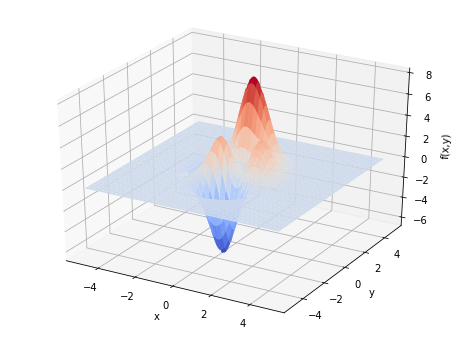

In [145]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

#### 1. Definición del problema y generación de la población inicial

Se importan las librerías necesarias

In [146]:
import random
from deap import base
from deap import creator
from deap import tools

In [147]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

##### 1.2 Creación de la plantilla del individuo 

In [148]:
creator.create("Individual", list, fitness=creator.FitnessMax)

##### 1.3 Crear individuos aleatorios y población inicial 

In [149]:
toolbox = base.Toolbox()

In [150]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [151]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

-37.970486136133474

In [152]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [153]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

In [154]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

In [155]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 100)

In [156]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)


[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [157]:
# Cada individuo tiene 2 componentes
poblacion[0]

[36.79678638308826, -5.571456909457325]

In [158]:
poblacion[0].fitness.values

()

#### 2. Función objetivo y operadores genéticos

##### 2.1 Función Objetivo 

In [159]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = 3*(1-x[0])**2*np.exp(-(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)-1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    return res,

In [160]:
toolbox.register("evaluate", funcion_objetivo)

In [161]:
# Ejemplo de uso 1
funcion_objetivo(individuo)

(0.0,)

In [162]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(0.0,)

#### 3. Incorporar los operadores genéticos

**CRUCE** 

In [163]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxOnePoint)

**MUTACIÓN** ---------------------------------------------

Utilizamos el operador `mutGaussian` (mutación Gaussiana) con una media de 0 y una deviación típica de 5 (son solo de ejemplo y no garantizan ser los más adecuados. Posiblemente habrá que probar valores distintos)

In [164]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

**SELECCIÓN** 

In [165]:
toolbox.register("select", tools.selTournament, tournsize=3)

#### 4. Últimos pasos: Algoritmo genético como una caja negra

##### 4.1 Configuración del Algoritmo Genético 

In [166]:
# Definimos la semilla del generador de números aleatorios
# Se hace así para tener resultados reproducibles
random.seed(42)

In [167]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
CXPB, MUTPB, NGEN = 0.5, 0.2, 20

In [168]:
#Generamos la Población Inicial
pop = toolbox.population()
pop

[[27.885359691576753, -94.99784895546661],
 [-44.99413632617615, -55.35785237023545],
 [47.29424283280247, 35.33989748458225],
 [78.43591354096907, -82.61223347411678],
 [-15.61563606294591, -94.04055611238593],
 [-56.27240503927933, 1.0710576206724767],
 [-94.69280606322728, -60.2324698626703],
 [29.976887555904653, 8.98829612064334],
 [-55.911875591860664, 17.85313677518174],
 [61.88609133556534, -98.7002480643878],
 [61.163850366561576, 39.62787899764538],
 [-31.949896696401623, -68.90410003764369],
 [91.44261444135623, -32.68109097747465],
 [-81.45083132397042, -80.65672463330719],
 [69.49887326949195, 20.745206273378216],
 [61.42565465487604, 45.94635733876359],
 [7.245618290940143, 94.62315279587412],
 [-24.29312455832931, 10.408126254645396],
 [65.88093285059898, 23.703950472849215],
 [72.34138006215545, 15.470429051352411],
 [40.914367242984696, -90.83512326886756],
 [-54.42034486969063, -42.12240727957857],
 [-84.04160461527451, -53.44182272779396],
 [-79.79971411805417, -44.4

In [169]:
# Definimos el objeto hof que almacenará el mejor individuo 
# encontrado a lo largo de las generaciones del Algoritmo G.
hof = tools.HallOfFame(1)
hof

In [170]:
print(hof)

[]


In [171]:
# Definimos un objeto para generar las estadísticas de la 
# población a lo largo de las generaciones del algoritmo
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

Ahora registramos en el objeto `stats` las funciones estadísticas a utilizar junto con su alias:

In [172]:
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

**ESTAMOS EN DISPOSICIÓN DE PODER EJECUTAR EL ALGORITMO GENÉTICO** 

In [173]:
# loogbook contendrá todo el registro de evolución
logbook = tools.Logbook()

In [174]:
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

In [175]:
print(pop)

[[0.11722261005967027, 1.2840423498683435], [-0.07765638291393667, 1.7919972024804398], [-0.07765638291393667, 1.7919972024804398], [-0.07765638291393667, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [0.11722261005967027, 1.7919972024804398], [0.06046700210138432, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [0.11722261005967027, 1.2840423498683435], [-0.07765638291393667, 1.7919972024804398], [0.06046700210138432, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [0.06046700210138432, 1.2840423498683435], [0.11722261005967027, 1.7919972024804398], [-0.07765638291393667, 1.2840423498683435], [0.06046700210138432, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [-0.07765638291393667, 1.2840423498683435], [-0.07765638291393667, 1.7919972024804398], [-0.07765638291393667, 1.28404234986834

In [176]:
print(logbook)

gen	nevals	avg         	std        	min         	max        
0  	100   	1.93843e-50 	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01       	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32 	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31 	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	

Agrupamos todo lo anterior en la función `main()` que realizará toda la **configuración** del algoritmo

In [177]:
def main():
    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(42)
    
    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.5, 0.2, 25
    
    #Generamos la Población Inicial
    pop = toolbox.population()
    
    # Definimos el objeto hof que almacenará el mejor individuo 
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(1)
    
    # Definimos un objeto para generar las estadísticas de la 
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    
    # Registramos en el objeto stats 
    # las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()
    
    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
   
    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook

##### 4.2 Resultados del Algoritmo Genético 

In [178]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])

gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

**CUESTIONES**---------------------------------------------

Datos que corresponden a las funciones registradas en el objeto `stats`
* `gen`: Generación en la que me encuentro
* `nevals`: Número de individuos que han sido evaluados respecto a su desempeño
    * No es igual al número de individuos porque los operadores de cruce y mutación son probabilísticos (un individuo seleccionado puede no haberse modificado y no será, por tanto, evaluado, ahorrando operaciones redundantes). Cuando un individuo **es modificado** debido a un operación de genética (cruce o mutación), su `fitness` se invalida, poniendo el atributo `valid=False`. En cada generación, todos los individuos que tienen un `fitness` **inválido** serán evaluados. 
* `avg`: Desempeño medio de la población
    * Se incrementa a lo largo de las generaciones. **Positivo** porque los **individuos** que forman la población son, en media, **mejores**
* `std`: Desviación típica del desempeño medio de la población
    * Disminuye, en general, a lo largo de las generaciones. **Positivo** porque los **individuos** que forman la población son, **cada vez más parecidos** y que el algoritmo es **elitista** por el proceso de selección
* `min`: Mínimo desempeño de la población
* `max`: Máximo desempeño de la población
    * Aumenta a lo largo de las generaciones. **Muy positivo** porque indica que el algoritmo funciona correctamente
    

Aunque `hof` lo hemos definido para que almecene solo un individuo, el objeto es una secuencia (como una lista en Python) por lo que para obtener el individuo o el `fitness` debemos usar el índice cero.


Al A.G. nos ha proporcionado en tan solo unos pasos una solución que es bastante buena - no es la mejor, pero está muy cerca.

In [179]:
print(log)

gen	nevals	avg         	std        	min         	max        
0  	100   	1.93843e-50 	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01       	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32 	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31 	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	

#### 5. ¿Cómo conseguir resultados consistentes?

Ahora lanzamos el Algoritmo Genético 20 veces

In [180]:
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [181]:
# Inicializamos la lista de las soluciones. Almacenaremos el fitness
# del mejor individuo de cada intento del algoritmo genético
lista_mejores = list()

# Lancamos el algoritmo 20 veces
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Al terminar el bucle, calculamos
# la mediay el mejor resultado de todos los intentos
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg       	std        	min          	max       
0  	100   	1.4504e-82	1.44313e-81	-4.39982e-279	1.4504e-80
1  	62    	0.00302488	0.0300972  	-1.18203e-07 	0.302488  
2  	53    	-5.86449e-09	4.11086e-08	-3.08547e-07 	2.04746e-45
3  	69    	-0.01       	0.0994987  	-1           	8.16393e-10
4  	55    	-3.47387e-10	3.61998e-09	-3.63478e-08 	8.16393e-10
5  	51    	4.06252e-11 	1.77977e-10	-6.47062e-12 	8.16393e-10
6  	50    	1.75435e-05 	0.000174562	-7.41531e-08 	0.00175442 
7  	53    	-2.00767e-05	0.000420082	-0.00382174  	0.00175442 
8  	52    	-3.89606e-05	0.000593546	-0.00382174  	0.00175442 
9  	66    	7.46791e-05 	0.00034322 	-1.83126e-14 	0.00175442 
10 	57    	0.000238071 	0.000742856	-0.00382174  	0.00175442 
11 	60    	0.00076642  	0.000991433	1.48214e-24  	0.00609949 
12 	49    	0.000423531 	0.00993643 	-0.0979795   	0.00609949 
13 	60    	0.00192842  	0.00103563 	1.25496e-31  	0.00609949 
14 	60    	0.00144867  	0.00937732 	-0.0901893   	0.0110375  
15 	46    	-0.011

#### 6. Convergencia del algoritmo

In [182]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 10])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

Pintamos la Gráfica:

gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

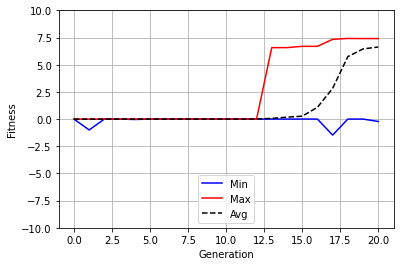

In [184]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 100)
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)